In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
Ecom_df = pd.read_csv(r"C:\Users\OSTRIPATHI\Downloads\Ecommerce Customers.csv")

In [3]:
Ecom_df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
Ecom_df.shape

(500, 8)

In [5]:
Ecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
Ecom_df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


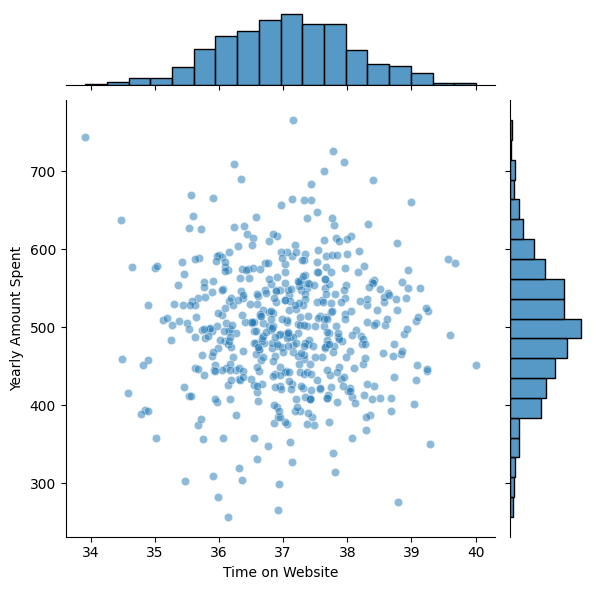

In [9]:
# Basic EDA

sns.jointplot(x="Time on Website",y="Yearly Amount Spent", data = Ecom_df, alpha =0.5)

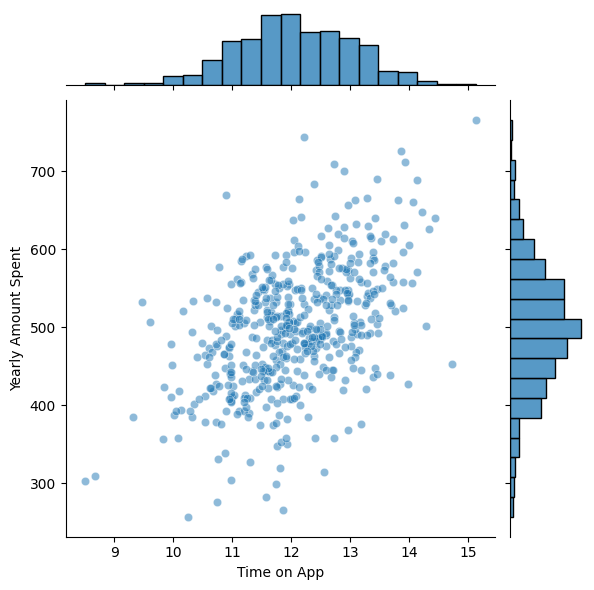

In [10]:
sns.jointplot(x="Time on App",y="Yearly Amount Spent", data = Ecom_df, alpha =0.5)

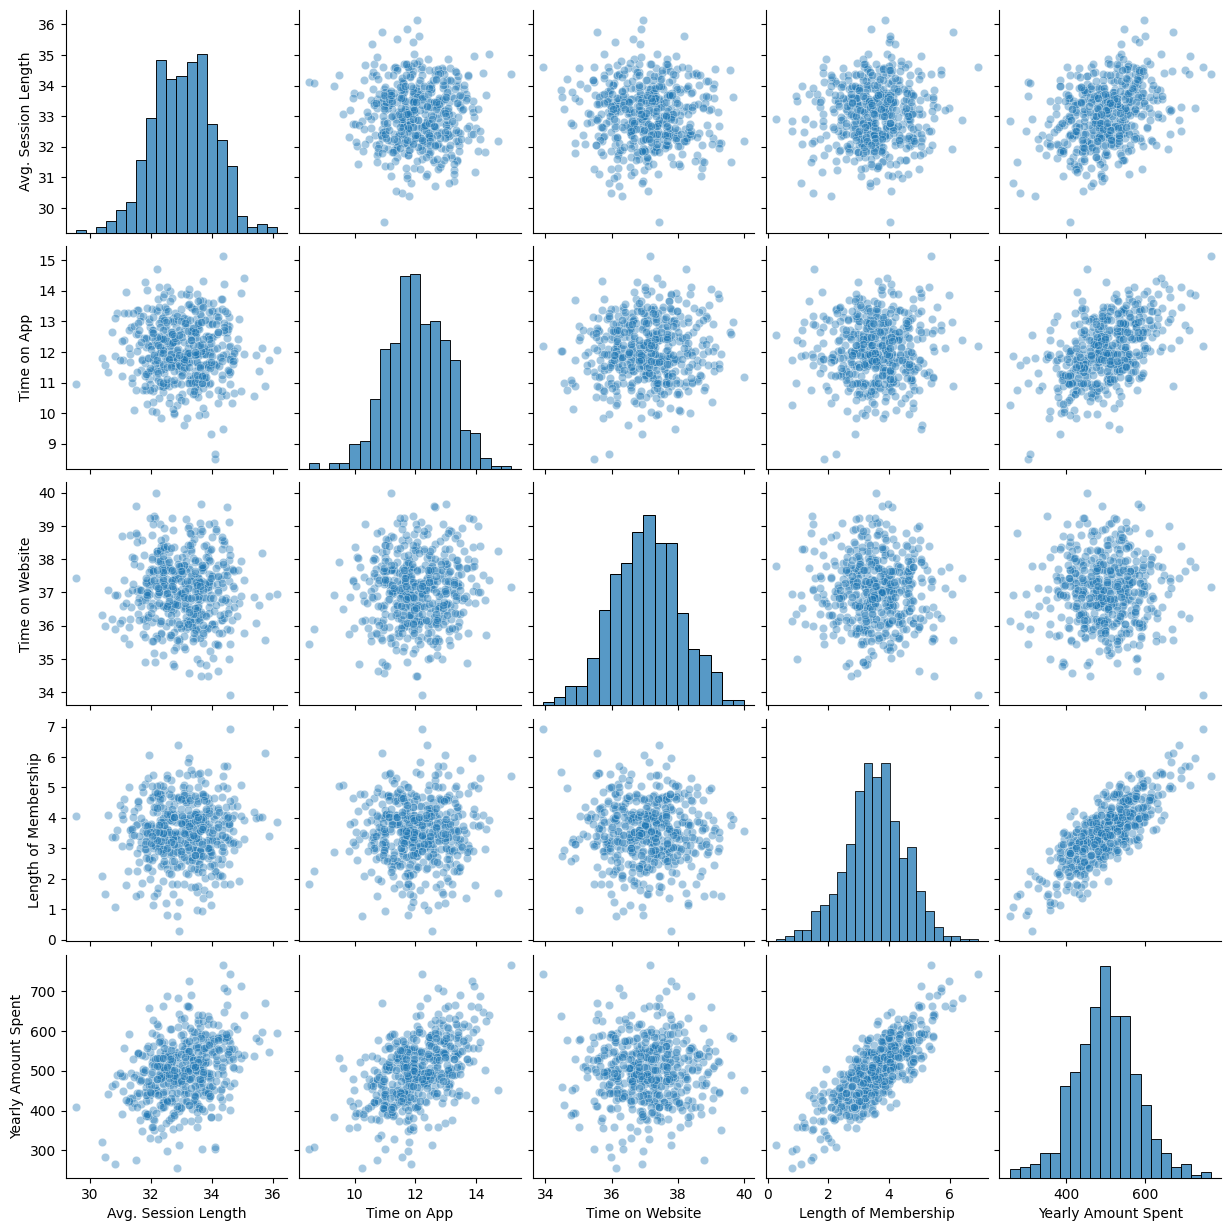

In [11]:
sns.pairplot(Ecom_df, kind='scatter', plot_kws={'alpha':0.4})

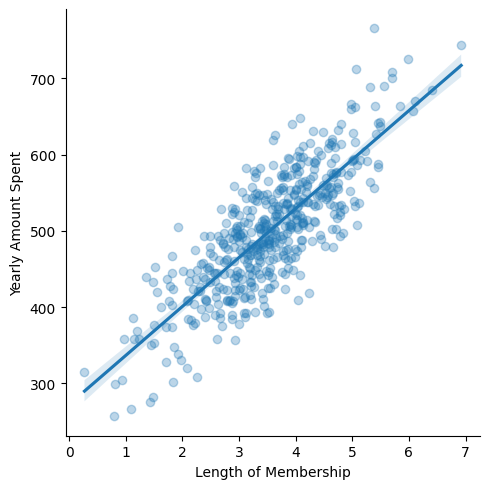

In [13]:
sns.lmplot(x="Length of Membership", y="Yearly Amount Spent", data=Ecom_df, scatter_kws={'alpha':0.3})

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
X = Ecom_df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
X

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


In [17]:
Y = Ecom_df['Yearly Amount Spent']
Y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=73)

In [21]:
# model traning 
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression()

In [23]:
model.fit(X_train, Y_train)

LinearRegression()

In [24]:
model.coef_

array([26.03161854, 38.73620908,  0.59508291, 61.22115538])

In [25]:
cdf = pd.DataFrame(model.coef_, X.columns, columns=['coef'])
cdf

,coef
Avg. Session Length,26.031619
Time on App,38.736209
Time on Website,0.595083
Length of Membership,61.221155


In [26]:
# Predictions 

predictions = model.predict(X_test)

In [27]:
predictions

array([459.62826042, 538.05206512, 581.86372925, 598.08961464,
       559.85862698, 684.51760616, 568.03592278, 478.19761634,
       316.12711807, 498.62712172, 519.95845201, 408.60448916,
       525.83217146, 486.95625391, 502.70202316, 493.64794274,
       481.79618902, 549.72022573, 572.54142322, 473.50853621,
       467.5689982 , 505.93172261, 504.45890085, 547.13580529,
       534.85273274, 569.13587911, 557.94895774, 353.33449431,
       509.55394254, 430.79836917, 502.7750576 , 306.74748904,
       549.34288145, 536.07083816, 412.05675738, 599.99122692,
       534.36509011, 480.42163625, 461.5760264 , 374.09522187,
       417.58244279, 357.88231769, 402.15128006, 436.26121544,
       552.35874156, 551.00605041, 571.09715511, 558.26289164,
       501.8113278 , 380.53465535, 432.98781292, 381.48077563,
       409.40284858, 536.82076431, 554.10212726, 652.22309672,
       314.73991384, 466.32117179, 507.11659601, 426.47502396,
       499.69108172, 545.10866629, 438.4856779 , 500.66

In [32]:
complete_eval = pd.DataFrame(predictions, Y_test)

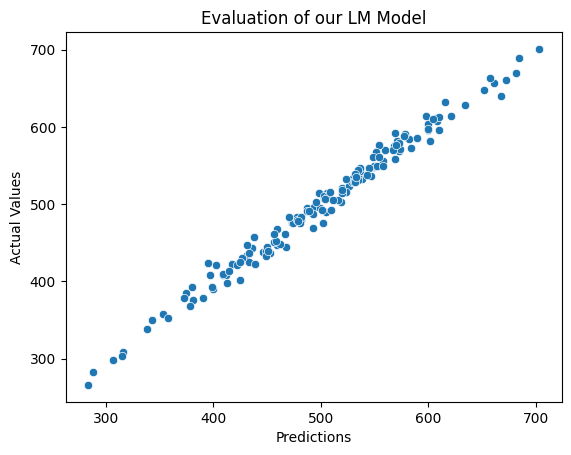

In [40]:
sns.scatterplot(x=predictions, y=Y_test)
plt.xlabel("Predictions")
plt.ylabel("Actual Values") 
plt.title("Evaluation of our LM Model")
plt.show()

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [43]:
print("Mean Absolute Error: ", mean_absolute_error(Y_test, predictions))
print("mean squared errpr: ", mean_squared_error(Y_test, predictions))
print("RMSE: ", math.sqrt(mean_squared_error(Y_test, predictions)))

Mean Absolute Error:  7.944028207817121
mean squared errpr:  102.08637449422034
RMSE:  10.103780208131031


In [44]:
#residuals 

residuals = Y_test - predictions 
residuals

31    -11.940354
176    -5.334579
315     2.242156
264    16.640023
8      10.341782
         ...    
240   -14.088277
24     -2.325059
403    16.211859
32     11.592859
121     6.574393
Name: Yearly Amount Spent, Length: 150, dtype: float64

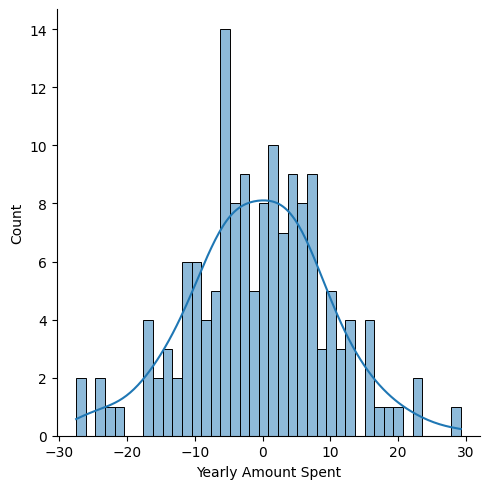

In [47]:
sns.displot(residuals, bins=40, kde = True)

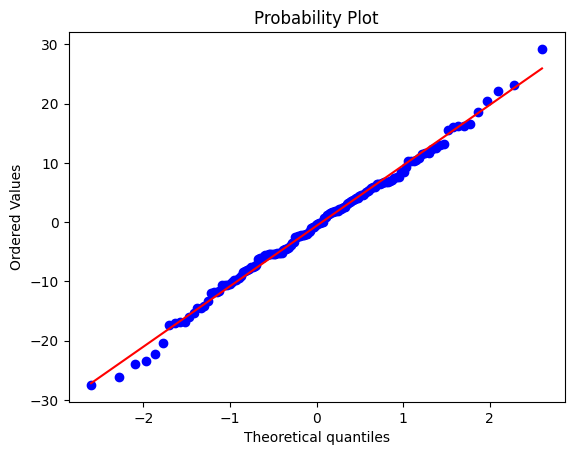

In [50]:
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist='norm', plot= pylab)
pylab.show()

In [58]:
type(X_test)

pandas.core.frame.DataFrame

In [60]:
model.predict(pd.DataFrame([[34.497268,12.655651,39.577668,4.082621]]))

c:\Users\OSTRIPATHI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([595.5767888])